# Micro_credit

#### problem statement:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [3]:
#reading the csv file
df=pd.read_csv("Micro_credit.csv",parse_dates=['pdate']) #use parse date as there is a date column
df.head() #view the top 5 rows of dataset

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# Data Exploration

In [4]:
#view the columns of dataset
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
#checking the dimensions of data
df.shape

(209593, 37)

There are 209593 records and 37 columns in the dataset

In [6]:
#checking the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            209593 non-null  int64         
 1   label                 209593 non-null  int64         
 2   msisdn                209593 non-null  object        
 3   aon                   209593 non-null  float64       
 4   daily_decr30          209593 non-null  float64       
 5   daily_decr90          209593 non-null  float64       
 6   rental30              209593 non-null  float64       
 7   rental90              209593 non-null  float64       
 8   last_rech_date_ma     209593 non-null  float64       
 9   last_rech_date_da     209593 non-null  float64       
 10  last_rech_amt_ma      209593 non-null  int64         
 11  cnt_ma_rech30         209593 non-null  int64         
 12  fr_ma_rech30          209593 non-null  float64       
 13 

#### observations

There are 13 columns with int64 type

21 features are float type

2 columns are object type

1 column is a datetime format

In [7]:
#data type can also be seen as below
df.dtypes

Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30              

columns with object data type are:
    
    1) msisdn
    
    2) pcircle
    
Rest of columns are float and int type

pdate is date time 

In [8]:
#check if there are any null values in the dataset
#df.isnull().any() can also be used that will return boolean result
df.isnull().sum()  #returns int value

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

The dataset is clean and has no Null values in it

In [9]:
#checking the unique values in each feature
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

#### observation

from the above output we can see that label has got only 2 unique entries i.e. 0 and 1

pcircle has got only 1 unique value

maxamnt_loans90 has 3 unique values and medianamnt_loans90 has 6 unique values

let us find them individually

In [10]:
#checking the unique values in pcircle
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

All the records have been taken from the same telecom circle which is UPW

In [11]:
#checking the unique values in medianamnt_loans30 
df['medianamnt_loans30'].value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

Median of amounts of loan taken by the user in last 30 days had 6 unique values which were 0.0, 1.0 ,0.5, 2.0, 1.5, 3.0

In [12]:
df['maxamnt_loans90'].value_counts() 

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

# Data preparation/cleaning

In [13]:
#have a look at the data once
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [14]:
#splitting the date column into year month and day
df['year']=pd.to_datetime(df['pdate'],format='%Y%m%d').dt.year
df['month']=pd.to_datetime(df['pdate'],format='%Y%m%d').dt.month
df['day']=pd.to_datetime(df['pdate'],format='%Y%m%d').dt.day


#delete the original column pdate
df.drop(columns='pdate',axis=1,inplace=True)
df.head() #cross check if the dataset is changed

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,year,month,day
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22


# dropping the unnecessary features

Features that needs to be dropped are as follows:
    
unnamed 0---> has nothing to do with our dataset it is just an indexing

pcircle----> has only one unique value i.e UPW so we need not to mention it everytime similarly all the records are taken for the same year i.e.2016 so we can proceed with dropping those 2 features as well

msisdn----> it is a unique identification number for each record hence we can drop it as it is not providing any useful information.

In [15]:
#drop the unnecessary columns
df.drop(columns=['Unnamed: 0','pcircle','year','msisdn'],axis=1,inplace=True)
df.sample()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
203111,0,163.0,0.0,0.0,1131.0,1305.0,0.0,0.0,0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,7,4


#### To reduce the redundancy further we shall study the correlation of each variable with target and then decide on data cleaning

#### it is strictly given that the paybck amount will only be either 6 or 12 but the feature has got some unrealistic values for which we shall perform some data cleaning

In [16]:
#replace all the values above 12 with np.nan and then the median values
median = df.loc[df['maxamnt_loans30']<12, 'maxamnt_loans30'].median()
df.loc[df.maxamnt_loans30 > 12, 'maxamnt_loans30'] = np.nan
df.fillna(median,inplace=True)

In [17]:
df['maxamnt_loans30'].value_counts()

6.0     180240
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64

The rows with 0 values shows that there is no loan histroy for that particular records

#  Data Visualization

In [18]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

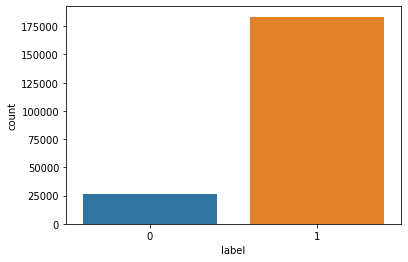

In [19]:
#let us check if the target variable is balanced or not
sns.countplot(df['label'])
plt.show()

#### observation:

There are 183431 Non-defaulters(who paid back the loan amount successfully) and 26162 defaulters

The class variable is imbalanced with less number of defaulters(0)i.e non defaulters is the minority class here

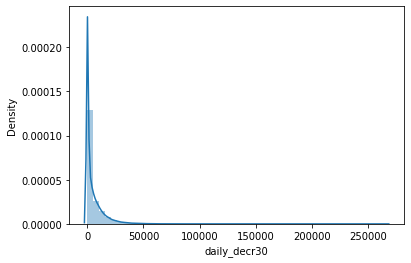

In [20]:
#view the distribution plot of 'daily_decr30'
sns.distplot(df['daily_decr30'])
plt.show()

#### observation

The curve shows a right tail which indicates right skew in the data 

For most of the records the daily amount spent from main account is 0 while the maximum amount is 4108.

The median can be obeserved at 1469

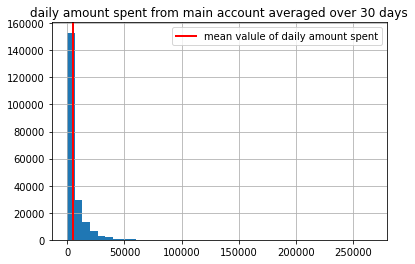

In [21]:
#plotting a histogram for the same 
df['daily_decr30'].hist(bins=40)
mean_value=np.mean(df['daily_decr30'])
plt.axvline(mean_value,linewidth=2,color='r',label="mean valule of daily amount spent")
plt.title("daily amount spent from main account averaged over 30 days")
plt.legend()
plt.show()

The mean value of daily amount spent from main account averaged over 30 days is 5381.402288913845

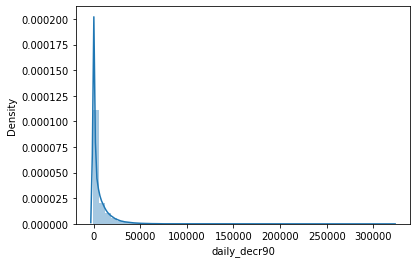

In [22]:
sns.distplot(df['daily_decr90'])
plt.show()

#### observation

The curve shows a right tail which indicates right skew in the data with skew=4.252565025615919

For most of the records the daily amount spent from main account is 0 while the maximum amount is 16839.040 

The median can be obeserved at 1500

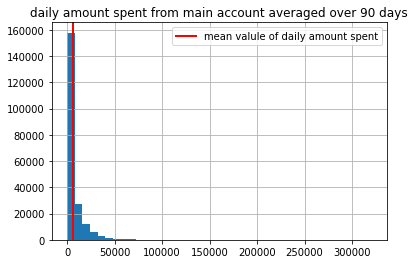

In [23]:
#plotting a histogram for the same 
df['daily_decr90'].hist(bins=40)
mean_value=np.mean(df['daily_decr90'])
plt.axvline(mean_value,linewidth=2,color='r',label="mean valule of daily amount spent")
plt.title("daily amount spent from main account averaged over 90 days")
plt.legend()
plt.show()

The mean value of daily amount spent from main account averaged over 30 days is 6082.515

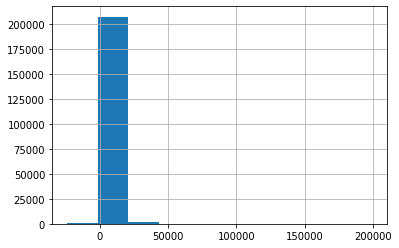

In [24]:
df['rental30'].hist()
plt.show()

The maximum value for average main account balance averaged over 30 days is 19896 indonessian rupiah

most of the records had 0 average balance 

median value=1083.5

mean value=2692.5

It can be clearly said that the data distribution is not normal as the mean is greater than median the data is positively skewed

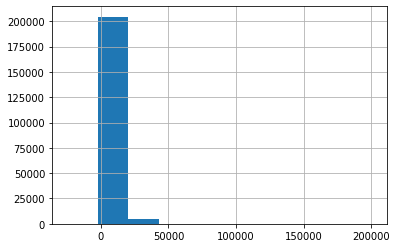

In [25]:
df['rental90'].hist()
plt.show()

The maximum value for average main account balance averaged over 90 days is 200148.11 indonessian rupiah

most of the records had 0 average balance

median value=1334

mean value=3483.40

the data distribution is positively skewed with skewness equal to 4.437680540074498

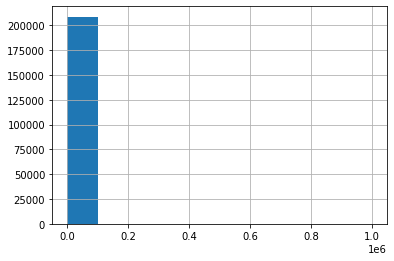

In [26]:
df['last_rech_date_ma'].hist()
plt.show()

The frequency for 1 is the hightest

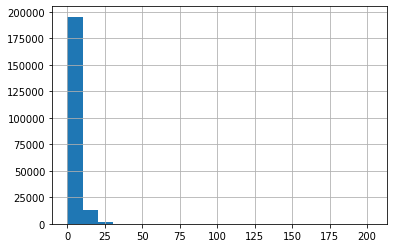

In [27]:
df['cnt_ma_rech30'].hist(bins=20)
plt.show()

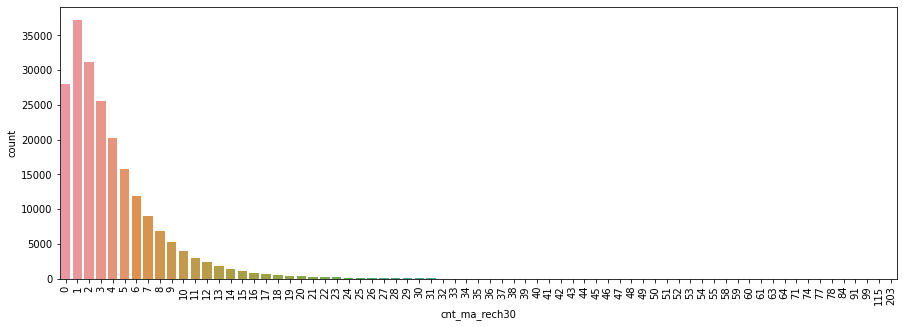

In [28]:
#visualizing how many times main account got recharged in last 30 days
plt.figure(figsize=(15,5))
sns.countplot(df['cnt_ma_rech30'])
plt.xticks(rotation=90)
plt.show()

#### observation

For maximum number of records the main account got recharged for atleast 1 time in last 30 days.There were 37238 customers who recharged once in last 30 days

27979 customers did not recharged at all in the last 30 days i.e. the 0 number of times 

The 2nd highest record could be seen for customers who recharged twice in last 30 days the count is 3216 customers.

very few customers recharged more than 20 times in 30 days

A decreasing trend could be observed after 10 recharges per month

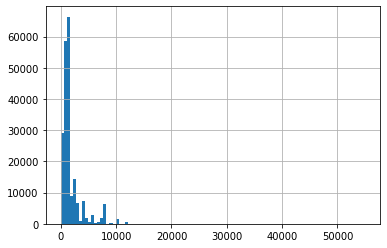

In [29]:
df['medianamnt_ma_rech30'].hist(bins=100)
plt.show()

The median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah) is maximum for 1539 value

The data distribution is not normal and shows skewness of 3.5 which says that the mean is greater than the median value


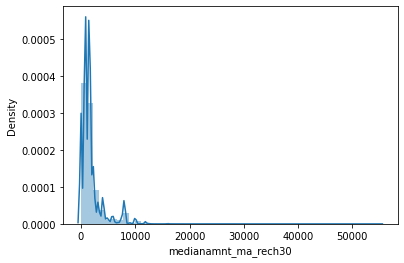

In [30]:
#viewing the skewness of data
sns.distplot(df['medianamnt_ma_rech30'])
plt.show()

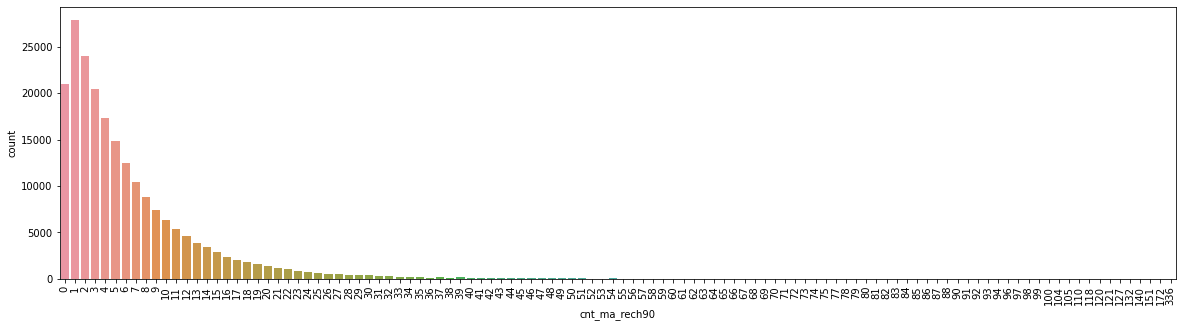

In [31]:
#visualizing how many times main account got recharged in last 30 days
plt.figure(figsize=(20,5))
sns.countplot(df['cnt_ma_rech90'])
plt.xticks(rotation=90)
plt.show()

#### observation

The trend seems similar to that of 30 days data 

Most of the customers tend to recharge only once in the past 90 days then followed by twice and thrice in 90 days

There were 20950 customers who did not recharged at all in the past 90 days

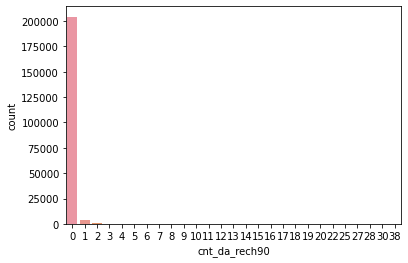

In [32]:
#Number of times data account got recharged in last 90 days
sns.countplot(df['cnt_da_rech90'])
plt.show()

most of the times the data account got recharged for 0 times in last 90 days i.e. the customers did not avail data services much.

Very few customers availed the data services which were 4173 in number

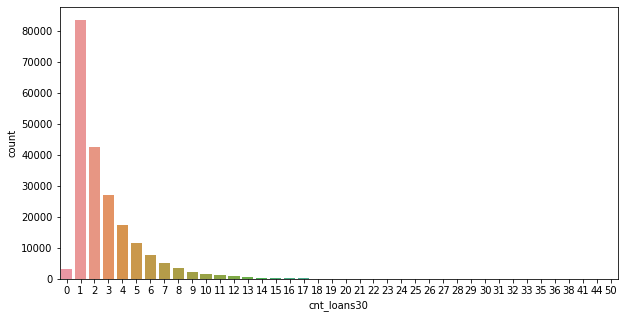

In [33]:
#Number of loans taken by user in last 30 days
plt.figure(figsize=(10,5))
sns.countplot(df['cnt_loans30'])
plt.show()

Maximum customers took loan for only 1 time in 30 days 

customers who took loan twice and thrice in a month were also high (42665 and 27050 respectively)

People who took loan above 6 times were basically less in number

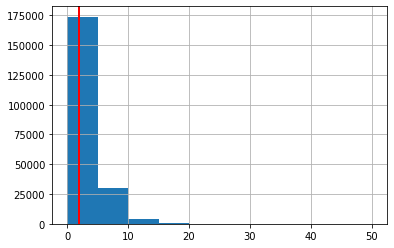

In [34]:
#the same can be viewed using histograms
df['cnt_loans30'].hist()
median=np.median(df['cnt_loans30'])
plt.axvline(median,linewidth=2,color='red')
plt.show()

The median value of number of loan taken in 30 days is 2.0

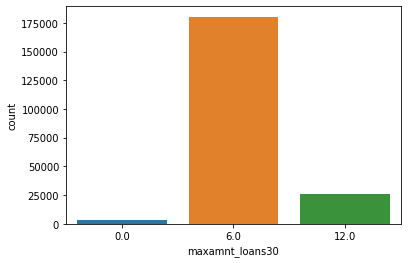

In [35]:
sns.countplot(df['maxamnt_loans30'])
plt.show()

#### observations

There are 3244 customers with no loan history

180240 customers who took 5 indonesian rupiah as loan and had to payback 6 insonesian rupiah

26109 customers who took 10 indonesian rupiah as loan and had to payback 12 insonesian rupiah



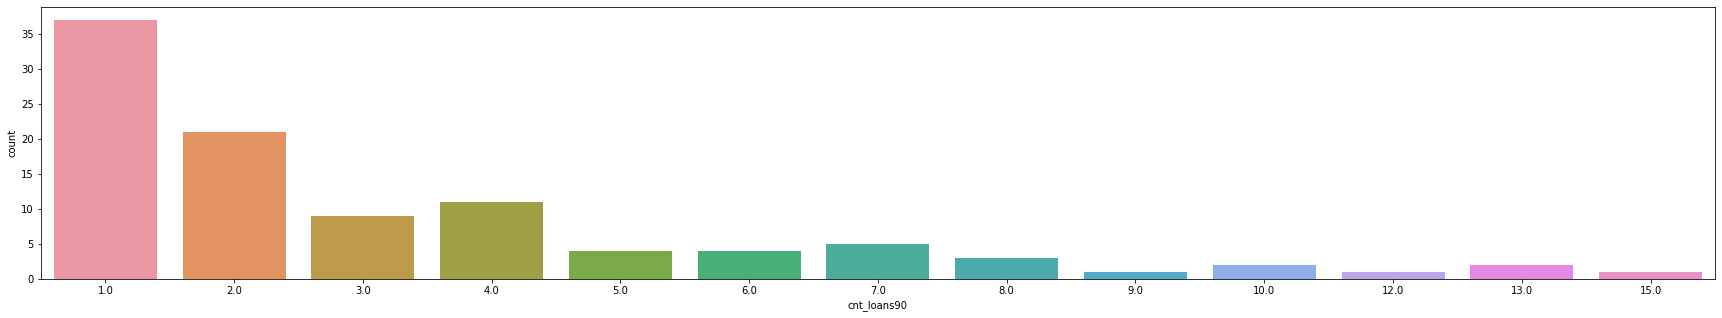

In [36]:
#Number of loans taken by user in last 90 days
plt.figure(figsize=(30,5))
sns.countplot(df['cnt_loans90'].loc[:100])
plt.show()

#### observation

Most of the customers took loan only once 

2nd highest record were taken for customers who took loan for 2 times

very few customers took loan for 9 times and above

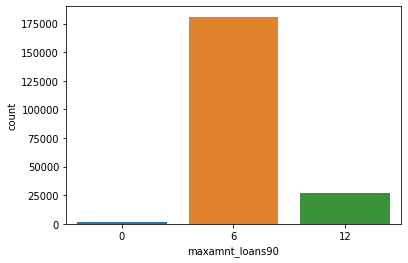

In [37]:
#number of loans taken over last 90 days
sns.countplot(df['maxamnt_loans90'])
plt.show()

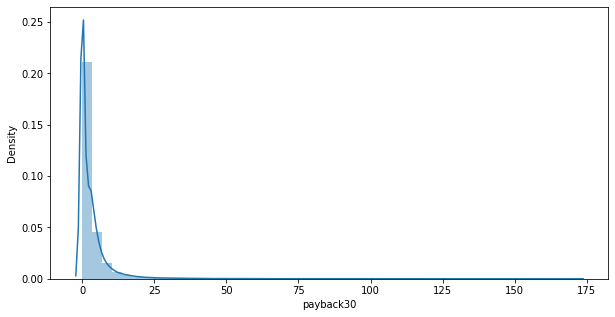

In [38]:
#Average payback time in days over last 30 days
plt.figure(figsize=(10,5))
sns.distplot(df['payback30'])
plt.show()

#### observation

The average number of days shows psitive skewness of 8.31

The mean value is 3.39 and median value is 0.0 the maximum value is seen at 171.5

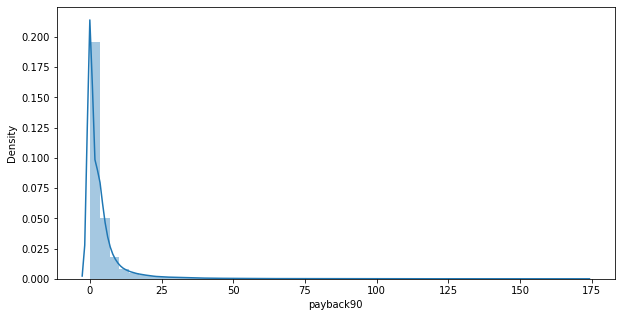

In [39]:
#Average payback time in days over last 30 days
plt.figure(figsize=(10,5))
sns.distplot(df['payback90'])
plt.show()

#### observation

The average number of days shows psitive skewness of 8.31

The mean value is 4.321 and median value is 1.66 the maximum value is seen at 171.5

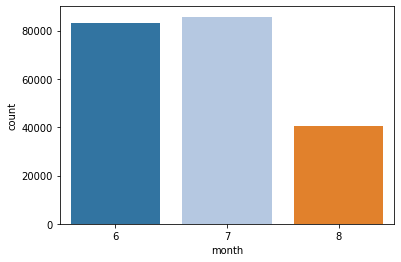

In [40]:
#count of months
sns.countplot(df['month'],palette='tab20')
plt.show()

#### observation

Most of the records are taken for the 7th month i.e. july

least records were found during august

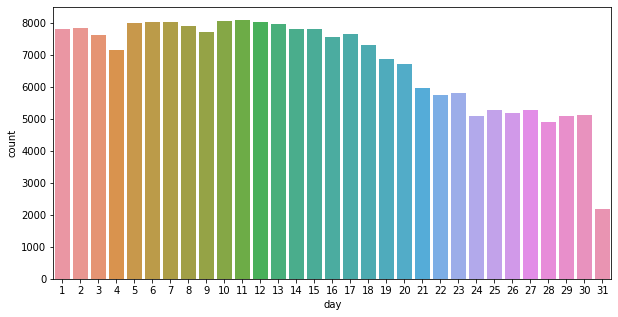

In [41]:
#days count
plt.figure(figsize=(10,5))
sns.countplot(df['day'])
plt.show()

Highest records were taken for day 11, 10 ,12 and 6

least records were found for 31st day of the month

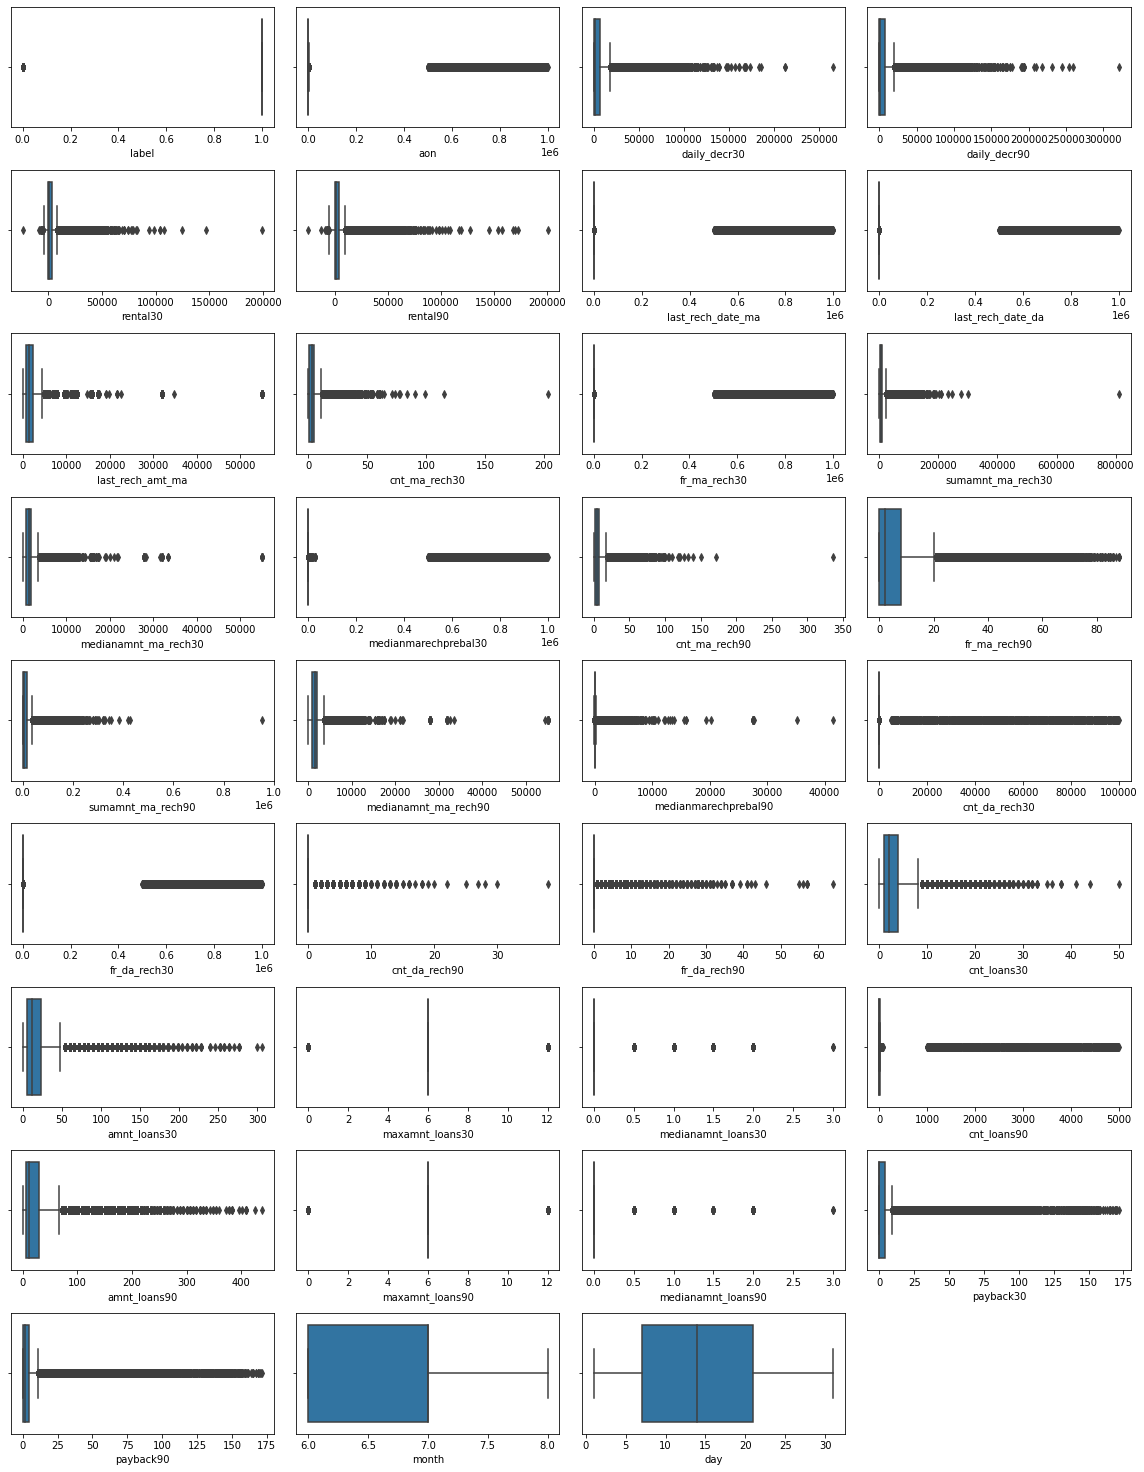

In [42]:
#visualizing the boxplot 
df_numeric = df.select_dtypes(include=[np.number]) #select only numeric values
cols=df_numeric.columns
ncol=4
nrow=16
plt.figure(figsize=(4*ncol,9*ncol))
for i in range(0,len(cols)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[cols[i]],orient='v')
    plt.tight_layout()

There are outliers present in all the features except for month and day

we shall treat these outliers later

# Multivariate Analysis

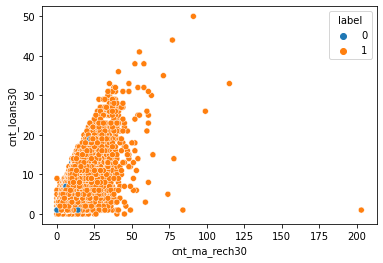

In [43]:
#how many times did the account got recharged in last 30 days and number of times the customer took loans in 30 days
sns.scatterplot(x='cnt_ma_rech30', y='cnt_loans30',hue='label',data=df)
plt.show()

#### observation

The graph shows a linear relationship 

we can infer that more the number of recharges done per 30 days the more the customer was likely to take loan

when the monthly recharge was done for 200 times the number of loans taken were less than 5

we can see some defaulters who recharged for 0 to approximately 20 times in a month and took loan for 3/4 times

When the frequency of recharges per month were more there were no defaulters at all

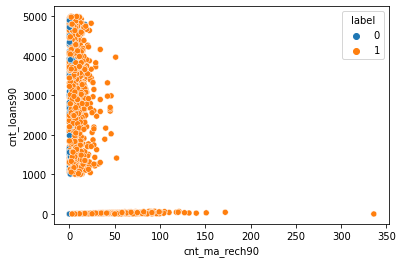

In [44]:
#how many times did the account got recharged in last 90 days and number of times the customer took loans in 90 days
sns.scatterplot(x='cnt_ma_rech90', y='cnt_loans90', hue='label',data=df)
plt.show()

#### observation

most of the people recharged for between 0 to 25 times.

the defaulters could be observed when the number of times recharged done was 0 but the number of times loan taken was really high

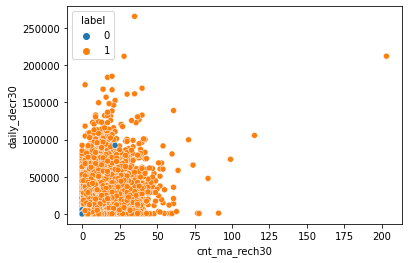

In [45]:
#how many times did the account got recharged in last 30 days and the daily decremented amount
sns.scatterplot(x='cnt_ma_rech30', y='daily_decr30',hue='label',data=df)
plt.show()

#### observation

customers who recharged frequently spent more amount daily from main account, averaged over last 30 days (in Indonesian Rupiah)

some defaulters could be seen for customers who did no recharged and has less spending daily also a defaulter can be seen when the monthly recharge frequency was 25 and daily spending was 1,00,000

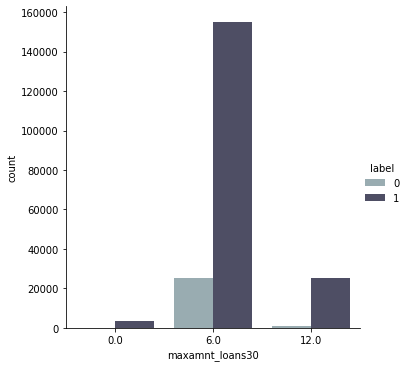

In [46]:
#checking which maxamnt_loan20 and label
sns.catplot(x="maxamnt_loans30", kind="count",hue="label",palette='bone_r', data=df)
plt.show()

#### observation

The customers who avialed for 5 rupiah as loan did not pay back the loan amount and were defaultersthat is denoted by 0 label 

as compared to 12 rupiah maximum number of customers successfully cleared the loan when the loan amount taken was 5 rupiah.

There are few customers with 0 loan history and are denoted as success

In the overall summary we can say that there were less number of defaulters than the one's who piad back the amount successfully

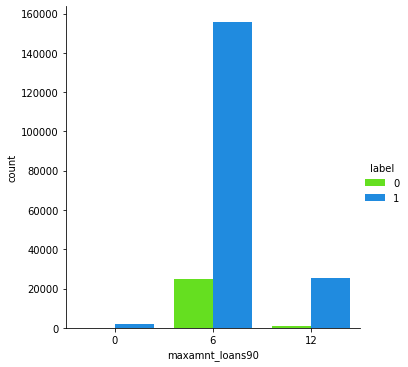

In [47]:
sns.catplot(x="maxamnt_loans90", kind="count",hue="label",palette='gist_rainbow', data=df)
plt.show()

#### observation

The success rate was high when the loan amount taken was 5 rupiah 

As a whole there were more loans successfully cleared by the customers as compared to the defaulters

The defaulters where in more number for 5 rupiah loan amount which should be paid back as 6 rupiah

# statistical analysis

In [48]:
#checking the correlation of all variables
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.073959,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.154949,0.006825
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001347,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,-0.001863,0.000662
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.380037,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.518664,0.006477
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.373505,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,0.539410,-0.021508
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.217851,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.228853,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,-0.001249,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,-0.001207,0.000560
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.002552,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,-0.001800,0.000631
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,0.137446,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.096919,0.028883
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.173481,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.156148,0.068643


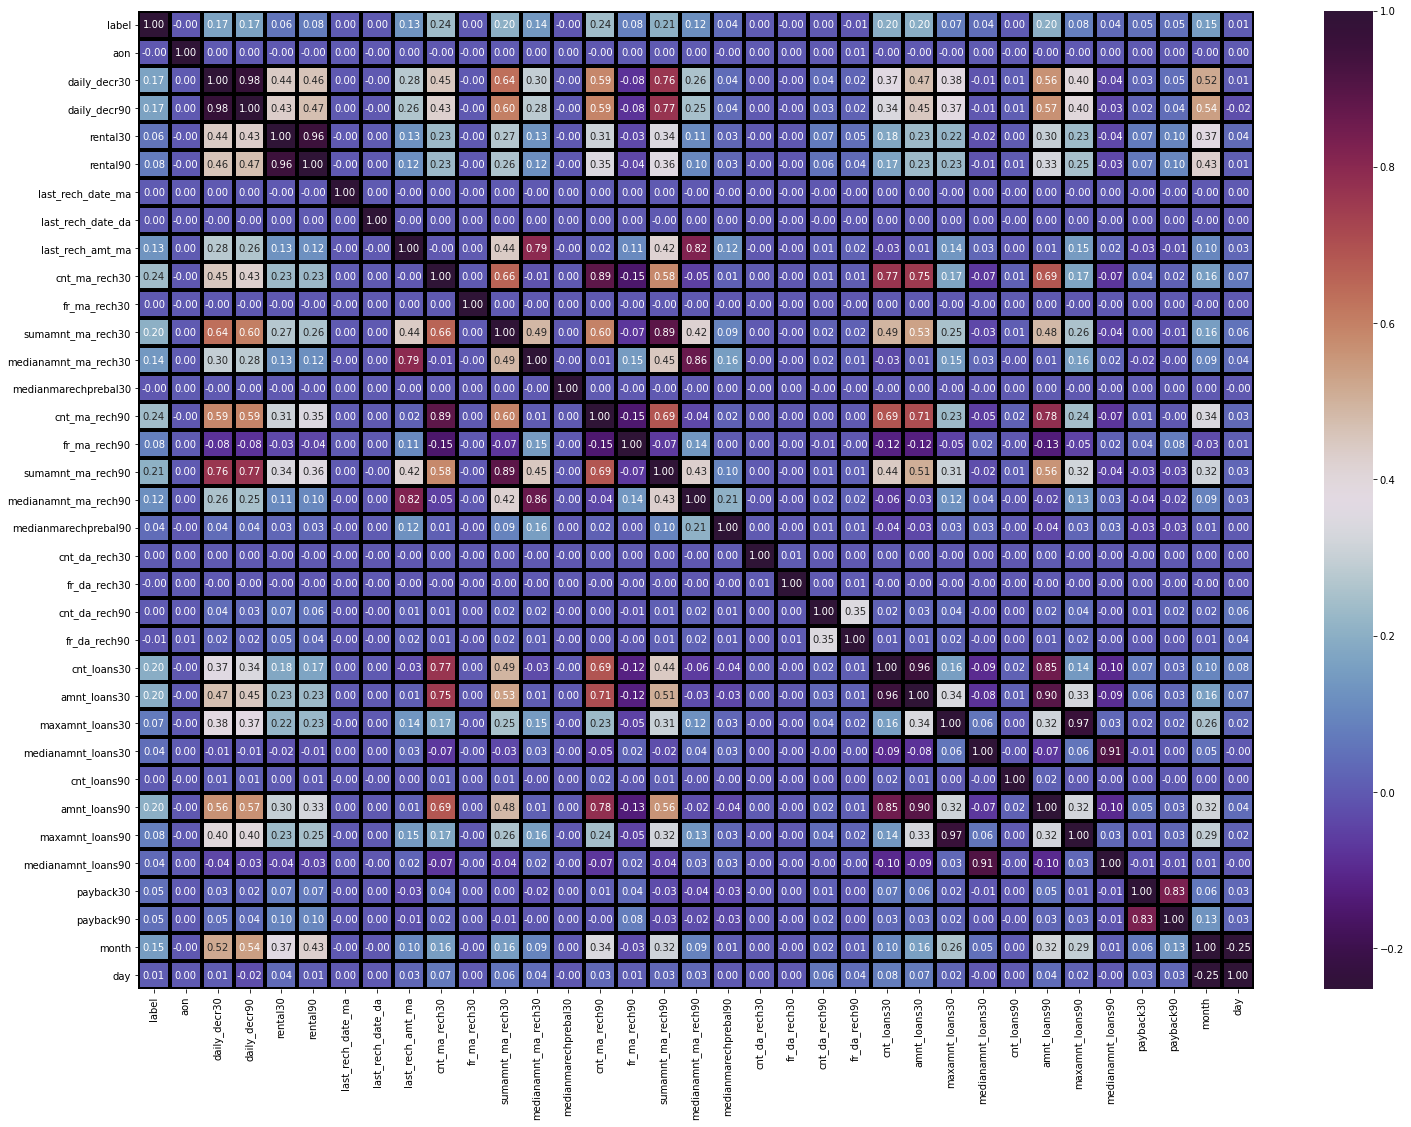

In [49]:
#plotting the correlation
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidth=3,linecolor='black',cmap= 'twilight_shifted')
plt.show()

Features with zero correlation with target variable :
    
    1)'aon'
    
    2) 'last_rech_date_ma' 
    
    3) 'last_rech_date_da'
    
    4) 'fr_ma_rech30'
    
    5) 'medianmarechprebal30'
    
    6) 'cnt_da_rech30'
    
    7) 'fr_da_rech30'
    
    8) 'cnt_da_rech90'
    
    9)'cnt_loans90'

In [50]:
#drop the features that show zero or approximately correlation with the target as they will not provide any predictive power to the model
df.drop(columns=['rental30','rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'medianmarechprebal30','medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'medianamnt_loans30',
       'medianamnt_loans90', 'payback30','payback90'],axis=1,inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,...,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,month,day
0,0,272.0,3055.050000,3065.150000,1539,2,21.0,3078.0,1539.0,2,...,3078,1539.0,2,12,6.0,2.0,12,6,7,20
1,1,712.0,12122.000000,12124.750000,5787,1,0.0,5787.0,5787.0,1,...,5787,5787.0,1,12,12.0,1.0,12,12,8,10
2,1,535.0,1398.000000,1398.000000,1539,1,0.0,1539.0,1539.0,1,...,1539,1539.0,1,6,6.0,1.0,6,6,8,19
3,1,241.0,21.228000,21.228000,947,0,0.0,0.0,0.0,1,...,947,947.0,2,12,6.0,2.0,12,6,6,6
4,1,947.0,150.619333,150.619333,2309,7,2.0,20029.0,2309.0,8,...,23496,2888.0,7,42,6.0,7.0,42,6,6,22


In [51]:
df.describe()

,label,aon,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,...,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,month,day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,6.31543,...,12396.218352,1864.595821,2.758981,17.952021,6.654554,18.520919,23.645398,6.703134,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,7.19347,...,16857.793882,2081.680664,2.554502,17.379741,2.147858,224.797423,26.469861,2.103864,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,770.000000,1.000000,0.000000,1540.000000,770.000000,2.00000,...,2317.000000,773.000000,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,4.00000,...,7226.000000,1539.000000,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,8.00000,...,16000.000000,1924.000000,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,336.00000,...,953036.000000,55000.000000,50.000000,306.000000,12.000000,4997.517944,438.000000,12.000000,8.000000,31.00000


for aon(age on network):
    
    minimun age is -48 and maximum is 999860 which is not a valid value so we can say that there are outliers in the column
    (a possible range that could be seen is between 246 and 982)
    
similarly for all the columns where there is a huge difference between the min and 25th percentile and maximum and 75th percentile we can predict that there are outliers present in the dataset

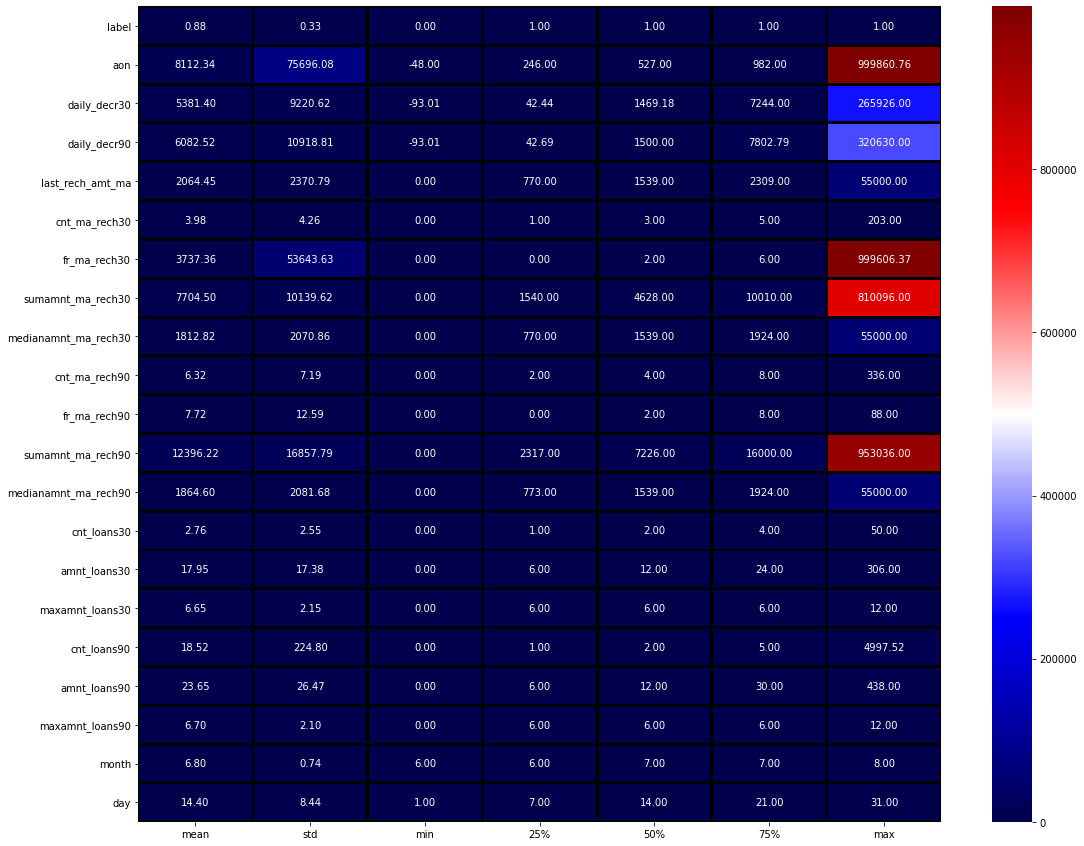

In [52]:
#plotting the df.describe
plt.figure(figsize=(18,15))
sns.heatmap(df.describe()[1:].transpose(),cmap='seismic',linewidth=2,linecolor='black',annot=True,fmt='.2f')
plt.show()


# zscore

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.33421157, 0.27336037,
        0.6637208 ],
       [0.37765836, 0.09776412, 0.73103667, ..., 2.51768994, 1.62209905,
        0.52127058],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.33421157, 1.62209905,
        0.54522166],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 2.51768994, 0.27336037,
        1.73021304],
       [0.37765836, 0.08428915, 0.77075515, ..., 2.51768994, 0.27336037,
        1.25621649],
       [0.37765836, 0.08628398, 0.09674426, ..., 2.51768994, 0.27336037,
        0.87676799]])

In [54]:
#check the index where zscores are greater than 3
threshold=3
print(np.where(z>3))

(array([    21,     22,     36, ..., 209580, 209581, 209586], dtype=int64), array([10, 10,  2, ..., 18,  3, 17], dtype=int64))


In [55]:
df_new=df[(z<3).all(axis=1)]
print("new shape=",df_new.shape)
print("original shape=",df.shape)

new shape= (180983, 21)
original shape= (209593, 21)


In [56]:
# % loss due to outliers will be :

print('percent data loss due to outliers using zscore',((209593-180983)/209593)*100)


percent data loss due to outliers using zscore 13.650265037477396


#### As there are huge number of outliers let us check using IQR 

In [57]:
#select 10th and 90th quantile this will minimize the outliers too
q1=df.quantile(0.10)
q3=df.quantile(0.90)
IQR=q3-q1
print(IQR)

label                       1.0000
aon                      1279.0000
daily_decr30            15582.0098
daily_decr90            17776.8258
last_rech_amt_ma         4067.0000
cnt_ma_rech30               9.0000
fr_ma_rech30               12.0000
sumamnt_ma_rech30       17892.0000
medianamnt_ma_rech30     4048.0000
cnt_ma_rech90              14.0000
fr_ma_rech90               30.0000
sumamnt_ma_rech90       29454.0000
medianamnt_ma_rech90     3875.0000
cnt_loans30                 5.0000
amnt_loans30               30.0000
maxamnt_loans30             6.0000
cnt_loans90                 8.0000
amnt_loans90               48.0000
maxamnt_loans90             6.0000
month                       2.0000
day                        24.0000
dtype: float64


In [58]:
#select the data that is not below or above the Interquartile range
df_out = df[~((df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR))).any(axis=1)]
print('shape without outliers=',df_out.shape)
print('original shape=',df.shape)

shape without outliers= (194784, 21)
original shape= (209593, 21)


In [59]:
#calculate the amount of data loss that is caused
loss=((209593-194784)/209593)*100
print("loss of data due to IQR selection=",loss)

loss of data due to IQR selection= 7.0655985648375665


#### As the project statement says we can afford 7% to 8% of data loss,here we are still under the limits and can therefore use the new df i.e df_out for our further modelling as it is causing only 7% of data loss which is acceptable

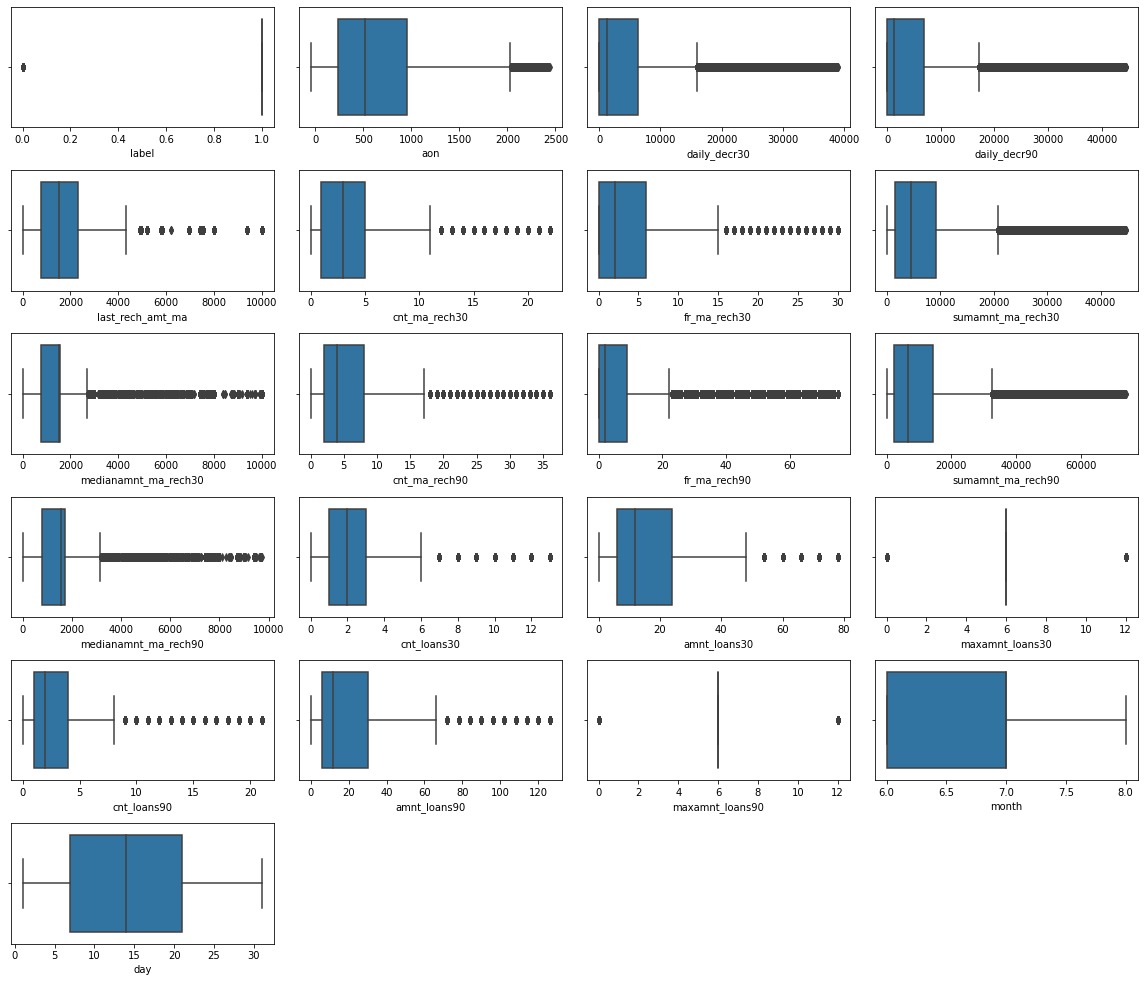

In [60]:
#visualize the outliers remaining post Iqr selection
df_numeric2 = df_out.select_dtypes(include=[np.number]) #select only numeric values
cols=df_numeric2.columns
ncol=4
nrow=16
plt.figure(figsize=(4*ncol,9*ncol))
for i in range(0,len(cols)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df_out[cols[i]],orient='v')
    plt.tight_layout()

#### Upon selecting the quantile ranges there are still some outliers which we will be treating now the method used to treat the outliers is flooring and capping which shall reduce our outliers to great extent

# Treating outliers

In [61]:
df['aon'].describe()

count    209593.000000
mean       8112.343445
std       75696.082531
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755168
Name: aon, dtype: float64

In [62]:
print(df['aon'].quantile(0.05))
print(df['aon'].quantile(0.95))

99.0
1749.0


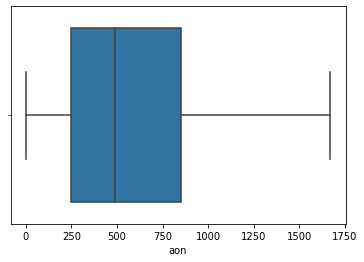

In [63]:
#replace values

df_out['aon']=np.where(df_out['aon']<0,np.nan,df_out['aon'])  #min value
df_out['aon']=np.where(df_out['aon']>1670.0,np.nan,df_out['aon'])

df_out['aon']=df_out['aon'].fillna(df_out['aon'].median())

#check if outliers are reduced
sns.boxplot(df_out['aon'])
plt.show()

#### similarly I have found the quantiles or min max values and replaced the outliers with them

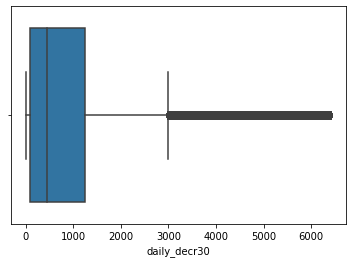

In [64]:
#replace values below 10th quantile and above 90th quantile 

df_out['daily_decr30']=np.where(df_out['daily_decr30']<8.03,np.nan,df_out['daily_decr30'])
df_out['daily_decr30']=np.where(df_out['daily_decr30']>6399.0,np.nan,df_out['daily_decr30'])

#replace nan values

df_out['daily_decr30']=df_out['daily_decr30'].fillna(df_out['daily_decr30'].median())

sns.boxplot(df_out['daily_decr30'])
plt.show()


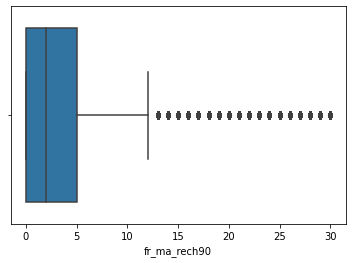

In [65]:
#replace values above 90th quantile 


df_out['fr_ma_rech90']=np.where(df_out['fr_ma_rech90']>30.0,np.nan,df_out['fr_ma_rech90'])

#replace nan values

df_out['fr_ma_rech90']=df_out['fr_ma_rech90'].fillna(df_out['fr_ma_rech90'].median())

sns.boxplot(df_out['fr_ma_rech90'])
plt.show()


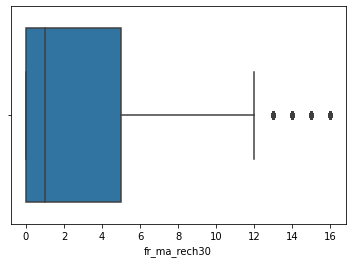

In [66]:
#replace values according to quantile 
df_out['fr_ma_rech30']=np.where(df_out['fr_ma_rech30']>16.0,np.nan,df_out['fr_ma_rech30'])

#replace nan values
df_out['fr_ma_rech30']=df_out['fr_ma_rech30'].fillna(df_out['fr_ma_rech30'].median())

sns.boxplot(df_out['fr_ma_rech30'])
plt.show()

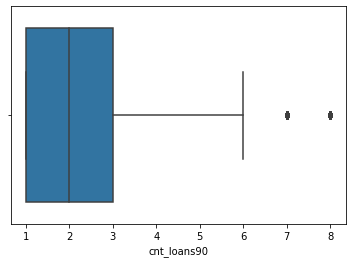

In [67]:
#replace values according to quantiles

df_out['cnt_loans90']=np.where(df_out['cnt_loans90']<1.0,np.nan,df_out['cnt_loans90'])
df_out['cnt_loans90']=np.where(df_out['cnt_loans90']>8.0,np.nan,df_out['cnt_loans90'])

#replace nan values
df_out['cnt_loans90']=df_out['cnt_loans90'].fillna(df_out['cnt_loans90'].median())

sns.boxplot(df_out['cnt_loans90'])
plt.show()


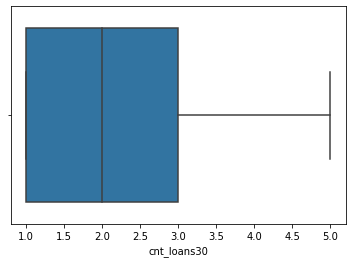

In [68]:
df_out['cnt_loans30']=np.where(df_out['cnt_loans30']<1.0,np.nan,df_out['cnt_loans30'])
df_out['cnt_loans30']=np.where(df_out['cnt_loans30']>5.0,np.nan,df_out['cnt_loans30'])

#replace nan values
df_out['cnt_loans30']=df_out['cnt_loans30'].fillna(df_out['cnt_loans30'].median())

#check with boxplot if there is reduction in outliers
sns.boxplot(df_out['cnt_loans30'])
plt.show()


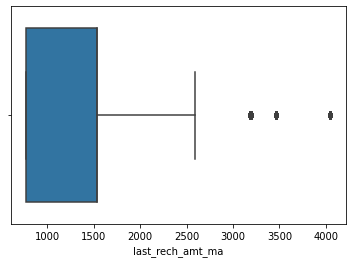

In [69]:
df_out['last_rech_amt_ma']=np.where(df_out['last_rech_amt_ma']<770.0,np.nan,df_out['last_rech_amt_ma'])
df_out['last_rech_amt_ma']=np.where(df_out['last_rech_amt_ma']>4048.0,np.nan,df_out['last_rech_amt_ma'])

#replace nan values
df_out['last_rech_amt_ma']=df_out['last_rech_amt_ma'].fillna(df_out['last_rech_amt_ma'].median())

sns.boxplot(df_out['last_rech_amt_ma'])
plt.show()


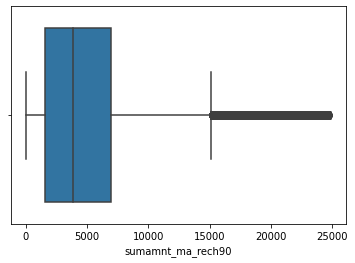

In [70]:
#replace values below 10th quantile and above 80th quantile 

df_out['sumamnt_ma_rech90']=np.where(df_out['sumamnt_ma_rech90']<0.0,np.nan,df_out['sumamnt_ma_rech90'])
df_out['sumamnt_ma_rech90']=np.where(df_out['sumamnt_ma_rech90']>24852.70,np.nan,df_out['sumamnt_ma_rech30'])

#replace nan values

df_out['sumamnt_ma_rech90']=df_out['sumamnt_ma_rech90'].fillna(df_out['sumamnt_ma_rech90'].median())

sns.boxplot(df_out['sumamnt_ma_rech90'])
plt.show()

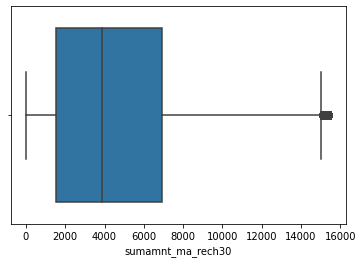

In [71]:
#replace values below 10th quantile and above 90th quantile 

df_out['sumamnt_ma_rech30']=np.where(df_out['sumamnt_ma_rech30']<0.0,np.nan,df_out['sumamnt_ma_rech30'])
df_out['sumamnt_ma_rech30']=np.where(df_out['sumamnt_ma_rech30']>15492.0,np.nan,df_out['sumamnt_ma_rech30'])

#replace nan values

df_out['sumamnt_ma_rech30']=df_out['sumamnt_ma_rech30'].fillna(df_out['sumamnt_ma_rech30'].median())

sns.boxplot(df_out['sumamnt_ma_rech30'])
plt.show()

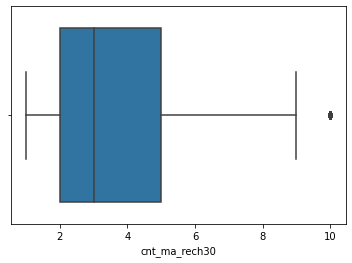

In [72]:
#replace values below 10th quantile and above 90th quantile 
df_out['cnt_ma_rech30']=np.where(df_out['cnt_ma_rech30']<1.0,np.nan,df_out['cnt_ma_rech30'])
df_out['cnt_ma_rech30']=np.where(df_out['cnt_ma_rech30']>10.0,np.nan,df_out['cnt_ma_rech30'])

#replace nan values
df_out['cnt_ma_rech30']=df_out['cnt_ma_rech30'].fillna(df_out['cnt_ma_rech30'].median())

sns.boxplot(df_out['cnt_ma_rech30'])
plt.show()

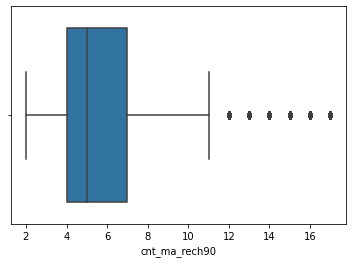

In [73]:
#replace values below 10th quantile and above 90th quantile 
df_out['cnt_ma_rech90']=np.where(df_out['cnt_ma_rech90']<2.0,np.nan,df_out['cnt_ma_rech90'])
df_out['cnt_ma_rech90']=np.where(df_out['cnt_ma_rech90']>17.0,np.nan,df_out['cnt_ma_rech90'])

#replace nan values
df_out['cnt_ma_rech90']=df_out['cnt_ma_rech90'].fillna(df_out['cnt_ma_rech90'].median())

sns.boxplot(df_out['cnt_ma_rech90'])
plt.show()

As few outliers are giving us useful information we should not prefer changing them 

# Model building

In [74]:
#splitting the data into input and output variable
x=df_out.drop(columns=['label'],axis=1)
x.sample()

,aon,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,month,day
189218,489.0,3119.153667,3131.07,1924.0,2.0,1.0,7711.0,3855.5,2.0,17.0,7711.0,3855.5,1.0,6,6.0,1.0,6,6,7,7


In [75]:
#assinging target variable
y=df_out['label']
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 194784, dtype: int64

In [76]:
#checking the skewness of data
x.skew()

aon                     0.751895
daily_decr30            1.800916
daily_decr90            2.115556
last_rech_amt_ma        1.577950
cnt_ma_rech30           1.071685
fr_ma_rech30            1.412165
sumamnt_ma_rech30       0.838550
medianamnt_ma_rech30    2.305473
cnt_ma_rech90           1.349674
fr_ma_rech90            2.216419
sumamnt_ma_rech90       1.304828
medianamnt_ma_rech90    2.303610
cnt_loans30             1.026972
amnt_loans30            1.692794
maxamnt_loans30         1.524493
cnt_loans90             1.258434
amnt_loans90            1.928727
maxamnt_loans90         1.802074
month                   0.380710
day                     0.193054
dtype: float64

In [77]:
#the power transformation is used to reduce the skew
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

x=pd.DataFrame(x)

In [78]:
#scailing input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [79]:
#splitting data into training and tetsing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [80]:
#importing required libraries
import imblearn
from imblearn.over_sampling import SMOTE

In [81]:
#use smote to balance the target variable

print('Before OverSampling, the shape of x_train: {}'.format(x_train.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

#resample the splits
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of x_train: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, the shape of x_train: (146088, 20)
After OverSampling, the shape of y_train: (146088,) 

Before OverSampling, counts of label '1': 127112
Before OverSampling, counts of label '0': 18976 

After OverSampling, the shape of x_train: (254224, 20)
After OverSampling, the shape of y_train: (254224,) 

After OverSampling, counts of label '1': 127112
After OverSampling, counts of label '0': 127112


#### we can see after using the SMOTE minority class has been resampled and now both the label counts have become equal in number

In [82]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
#import libraries for evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [83]:
#Hypertuning the logistic regressor
lg=LogisticRegression()
parameters={'penalty':['l2','elasticnet'],'fit_intercept':[True,False]}
clf=GridSearchCV(lg,parameters)
clf.fit(x_train_res,y_train_res)
print(clf.best_params_)

{'fit_intercept': True, 'penalty': 'l2'}


In [84]:
#using the best parameters found
lg=LogisticRegression(class_weight='balanced',penalty='l2',fit_intercept=True)
lg.fit(x_train_res,y_train_res)
y_pred=lg.predict(x_test)
lg_score=accuracy_score(y_test,y_pred)*100
print("accuracy",lg_score)
lg_crossval=cross_val_score(lg,x,y,cv=5).mean()*100
print("cross_validation score=",lg_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 74.50714637752588
cross_validation score= 74.46607594073058


confusion matrix 
 [[ 4908  1426]
 [10988 31374]]


classification report
               precision    recall  f1-score   support

           0       0.31      0.77      0.44      6334
           1       0.96      0.74      0.83     42362

    accuracy                           0.75     48696
   macro avg       0.63      0.76      0.64     48696
weighted avg       0.87      0.75      0.78     48696



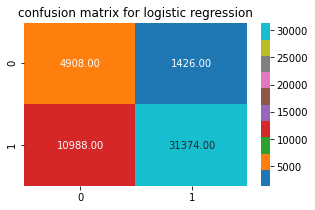

In [85]:
#confusion matrix for logistic regression
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='tab10',fmt="0.2f")
plt.title("confusion matrix for logistic regression")
plt.show()

#### Observations

for class 0 ---> 4908 values are correctly predicted as class 0 while 1426 are errors i.e they are predicted as class 1

for class 1---->31374 values are correct predictions while 10988 are errors

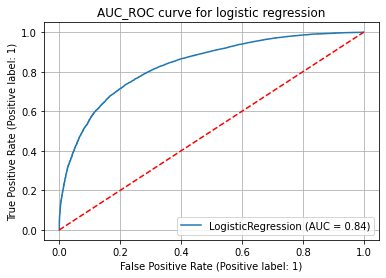

In [86]:
#plotting the AUC-ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lg, x_test, y_test)
plt.plot([0,1],[0,1],'k--',color='r')
plt.grid()
plt.title('AUC_ROC curve for logistic regression')
plt.show()

#### observation

Here, the true positive rates are plotted against false positive rates. The closer AUC for a model comes to 1, the better it is.Models with higher AUCs are preferred over those with lower AUCs.

# Decision Tree Classifier

In [87]:
#hypertunning Decision Tree Classifier

dtc=DecisionTreeClassifier()
parameters={"splitter":["best","random"],"criterion":["gini","entropy"],
            "max_features":['auto','sqrt','log2']}
pqr=GridSearchCV(dtc,parameters)
pqr.fit(x_train_res,y_train_res)
print(pqr.best_params_)
                          

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}


In [88]:
#using the best parameter obtained above
dtc=DecisionTreeClassifier(criterion='entropy', max_features= 'sqrt', splitter='best')
dtc.fit(x_train_res,y_train_res)
y_pred=dtc.predict(x_test)
dtc_score=accuracy_score(y_test,y_pred)*100
print("accuracy",dtc_score)
dtc_crossval=cross_val_score(dtc,x,y,cv=5).mean()*100
print("cross_validation score=",dtc_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 86.1795630031214
cross_validation score= 87.64528991702824


confusion matrix 
 [[ 3900  2434]
 [ 4296 38066]]


classification report
               precision    recall  f1-score   support

           0       0.48      0.62      0.54      6334
           1       0.94      0.90      0.92     42362

    accuracy                           0.86     48696
   macro avg       0.71      0.76      0.73     48696
weighted avg       0.88      0.86      0.87     48696



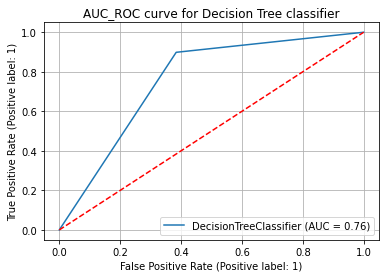

In [89]:
plot_roc_curve(dtc, x_test, y_test)
plt.plot([0,1],[0,1],'k--',color='r')
plt.grid()
plt.title('AUC_ROC curve for Decision Tree classifier')
plt.show()

# Random forest classifier

In [ ]:
#hypertunning RandomForest Classifier
#as the run time is large i have just executed it once and found out the best parameters and tuned it below
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

parameters={"n_estimators":[80,90],"criterion":['gini','entropy'],"max_features":["auto","sqrt","log2"]}
abc=GridSearchCV(rfc,parameters)
abc.fit(x_train_res,y_train_res)
print(abc.best_params_)
                                

In [90]:
#using the best parameter obtained above
rfc=RandomForestClassifier(criterion='entropy',max_features="sqrt",n_estimators=90)
rfc.fit(x_train_res,y_train_res)
y_pred=rfc.predict(x_test)
rfc_score=accuracy_score(y_test,y_pred)*100
print("accuracy",rfc_score)
rfc_crossval=cross_val_score(rfc,x,y,cv=5).mean()*100
print("cross_validation score=",rfc_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 90.38524724823395
cross_validation score= 91.32474936763879


confusion matrix 
 [[ 4019  2315]
 [ 2367 39995]]


classification report
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      6334
           1       0.95      0.94      0.94     42362

    accuracy                           0.90     48696
   macro avg       0.79      0.79      0.79     48696
weighted avg       0.90      0.90      0.90     48696



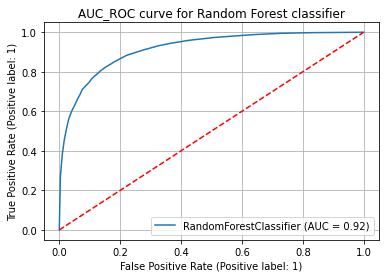

In [91]:
plot_roc_curve(rfc, x_test, y_test)
plt.plot([0,1],[0,1],'k--',color='r')
plt.grid()
plt.title('AUC_ROC curve for Random Forest classifier')
plt.show()

In [92]:
# the best parameters are found using gridsearchcv
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.2,n_estimators=200,criterion='mse')
gb.fit(x_train_res,y_train_res)
y_pred=gb.predict(x_test)
gb_score=accuracy_score(y_test,y_pred)*100
print("accuracy",gb_score)
gb_crossval=cross_val_score(gb,x,y,cv=5).mean()*100
print("cross_validation score=",gb_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 90.34622966978807
cross_validation score= 91.66615329768376


confusion matrix 
 [[ 4349  1985]
 [ 2716 39646]]


classification report
               precision    recall  f1-score   support

           0       0.62      0.69      0.65      6334
           1       0.95      0.94      0.94     42362

    accuracy                           0.90     48696
   macro avg       0.78      0.81      0.80     48696
weighted avg       0.91      0.90      0.91     48696



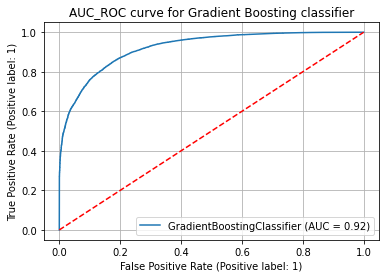

In [93]:
#'AUC_ROC curve for Gradient Boosting classifier'
plot_roc_curve(gb, x_test, y_test)
plt.plot([0,1],[0,1],'k--',color='r')
plt.grid()
plt.title('AUC_ROC curve for Gradient Boosting classifier')
plt.show()

# Gaussian Nb

In [94]:
gnb=GaussianNB()
gnb.fit(x_train_res,y_train_res)
y_pred=gnb.predict(x_test)
gnb_score=accuracy_score(y_test,y_pred)*100
print("accuracy",gnb_score)
gnb_crossval=cross_val_score(gnb,x,y,cv=5).mean()*100
print("cross_validation score=",gnb_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))



accuracy 71.04279612288484
cross_validation score= 75.18584751413015


confusion matrix 
 [[ 5030  1304]
 [12797 29565]]


classification report
               precision    recall  f1-score   support

           0       0.28      0.79      0.42      6334
           1       0.96      0.70      0.81     42362

    accuracy                           0.71     48696
   macro avg       0.62      0.75      0.61     48696
weighted avg       0.87      0.71      0.76     48696



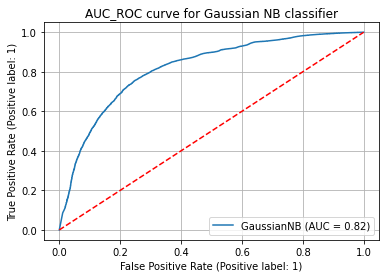

In [95]:
plot_roc_curve(gnb, x_test, y_test)
plt.plot([0,1],[0,1],'k--',color='r')
plt.grid()
plt.title('AUC_ROC curve for Gaussian NB classifier')
plt.show()

# Saving the best model

In [96]:
#saving logistic regression as our best model
import pickle
filename="micro_credit.pkl"
pickle.dump(lg,open(filename,'wb'))

In [97]:
actual=np.array(y_test)
predicted=np.array(lg.predict(x_test))

In [98]:
#making a dataframe
df_com=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_com

,actual values,predicted values
0,1,1
1,0,0
2,0,1
3,0,0
4,1,1
...,...,...
48691,1,1
48692,0,1
48693,1,0
48694,1,1


In [99]:
#saving the predicted results as csv file 
df_com.to_csv('micro_credict_predictions.csv')

#### Thankyou